## Import the moths data from the .csv file.

In [1]:
moths <- 
  read.csv("moths.csv",
   header=TRUE, sep=",", na.strings="NA", dec=".", strip.white=TRUE)
moths

region,site,area,ForstCover,Treediversity,Isolation,spp,lat,long
WAP,ClearCreek,289.0,84.9,5.59,6.89,85,39.593,-82.573
WAP,CraneHollow,180.9,82.2,8.61,6.80,81,39.630,-82.558
WAP,Phinney,93.5,84.3,6.84,6.70,96,39.558,-82.500
WAP,Rockbridge,89.8,38.3,5.09,6.34,47,39.575,-82.500
WAP,Wahkeena,72.8,53.4,2.25,6.38,65,39.635,-82.529
WAP,Klinger,22.6,29.3,7.06,6.03,66,39.587,-82.831
WAP,Fairview,6.9,12.5,3.94,5.43,43,39.525,-82.450
WAP,WindyHills,3.8,38.5,4.97,6.00,41,39.583,-82.533
WAP,RidgeLaurel,1.7,56.2,7.69,6.20,49,39.499,-82.573
NCT,Pater,230.6,37.1,9.01,6.21,90,39.433,-84.742


## Now, let's install some R packages that will be useful as we start to look at and analyze the data.

In [2]:
install.packages("primer", repos='http://cran.us.r-project.org', dependencies=TRUE)
install.packages("car", repos='http://cran.us.r-project.org', dependencies=TRUE)
install.packages("histogram", repos='http://cran.us.r-project.org', dependencies=TRUE)
install.packages("lattice", repos='http://cran.us.r-project.org', dependencies=TRUE)

library("primer")
library("histogram")
library("lattice")

also installing the dependencies ‘gtools’, ‘permute’, ‘deSolve’, ‘bbmle’, ‘gdata’, ‘vegan’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘zip’, ‘estimability’, ‘webshot’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘effects’, ‘bdsmatrix’, ‘crosstalk’, ‘manipulateWidget’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘alr4’, ‘coxme’, ‘leaps’, ‘lmtest’, ‘MatrixModels’, ‘rgl’, ‘sandwich’, ‘SparseM’, ‘survey’

Warning message in install.packages("car", repos = "http://cran.us.r-project.org", :
“installation of package ‘rgl’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘latticeExtra’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: deSolve
Loading required package: lattice

Attaching p

# The first thing we want to do is make sure that our response variable (moth species) is well-behaved. Does it have a normal distribution?

## To test this assumption, let's start by visualizing the distribution using a histogram...

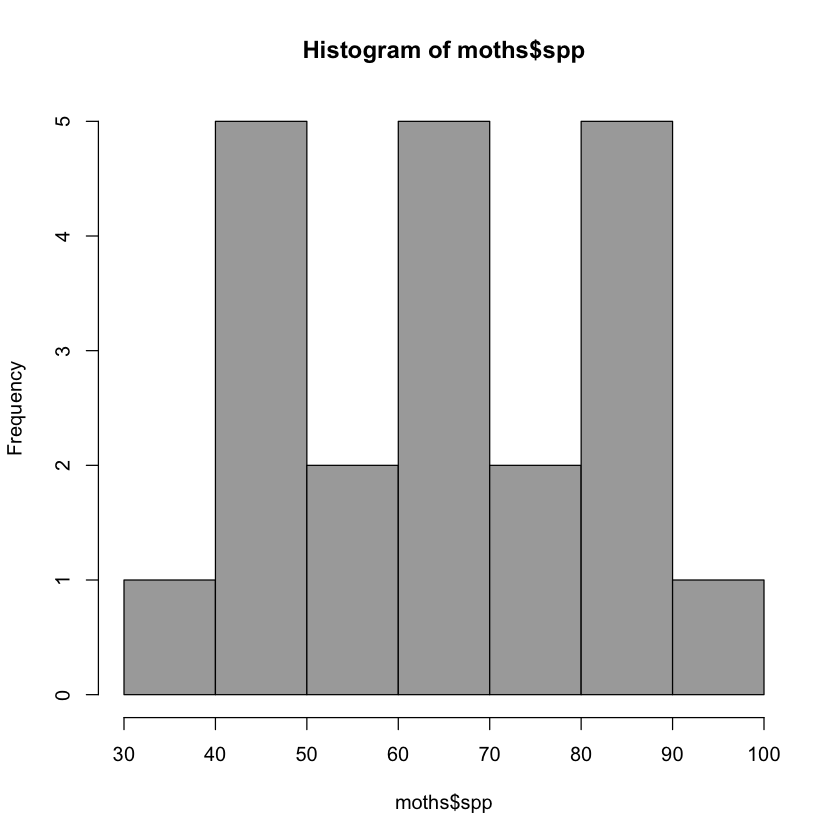

In [25]:
hist(moths$spp, col="darkgray")

# What are your thoughts about the distribution of our moth species data from looking at the histogram?

## We can statistically assess for normality using the Shapiro Test, which tests the null hypothesis that the sample being tested is normally distributed.

In [4]:
shapiro.test(moths$spp)


	Shapiro-Wilk normality test

data:  moths$spp
W = 0.96008, p-value = 0.5178


## How do we interpret this? If the p value is less than our significance level (p < 0.05), then we don't reject the null hypothesis. Our p-value here is 0.5178; this means that our sample follows a normal distribution.

## However, it is standard to look at the log distribution. Let's log transform the histogram and run the Shapiro Test again.

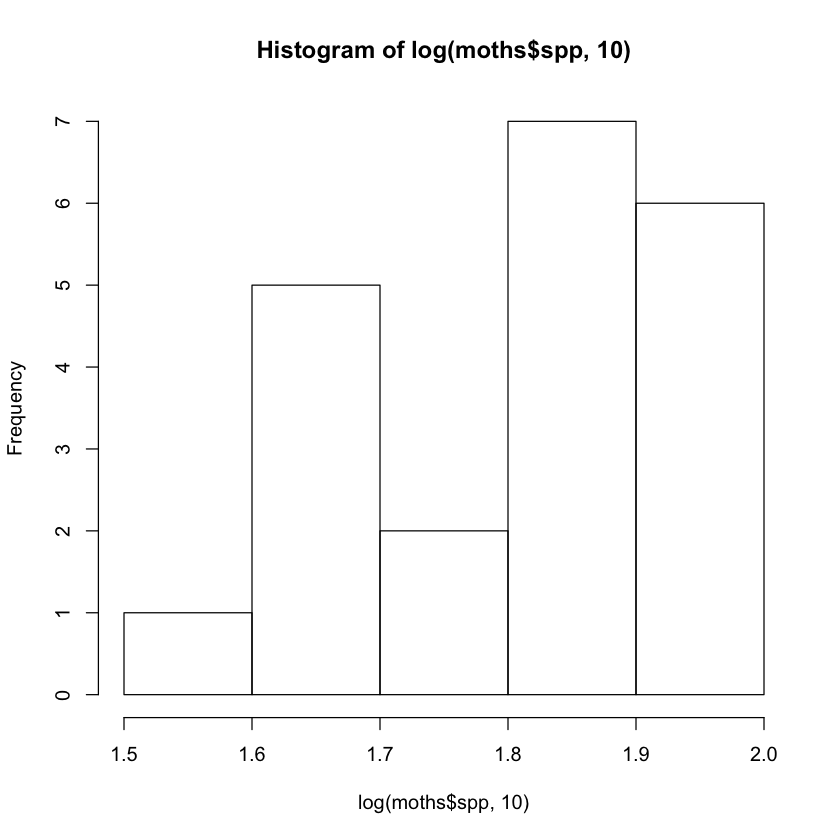

In [5]:
hist(log(moths$spp, 10))

In [6]:
shapiro.test(log(moths$spp,10))


	Shapiro-Wilk normality test

data:  log(moths$spp, 10)
W = 0.94994, p-value = 0.3398


# Does the Shapiro Test still show our moth species data as being normally distributed?

## Now, do the same with our continuous variable of interest: isolation.

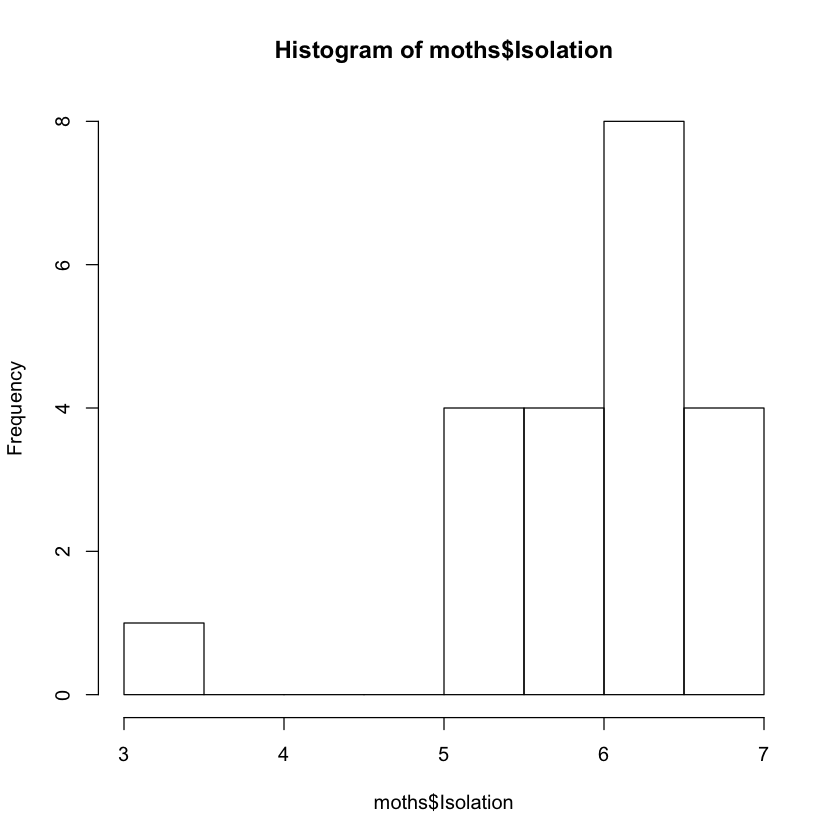

In [7]:
hist(moths$Isolation)

# What are your thoughts about this histogram? Does it look normally-distributed?

## We can generate a box-and-whiskers plot as another way of looking at the distribution.

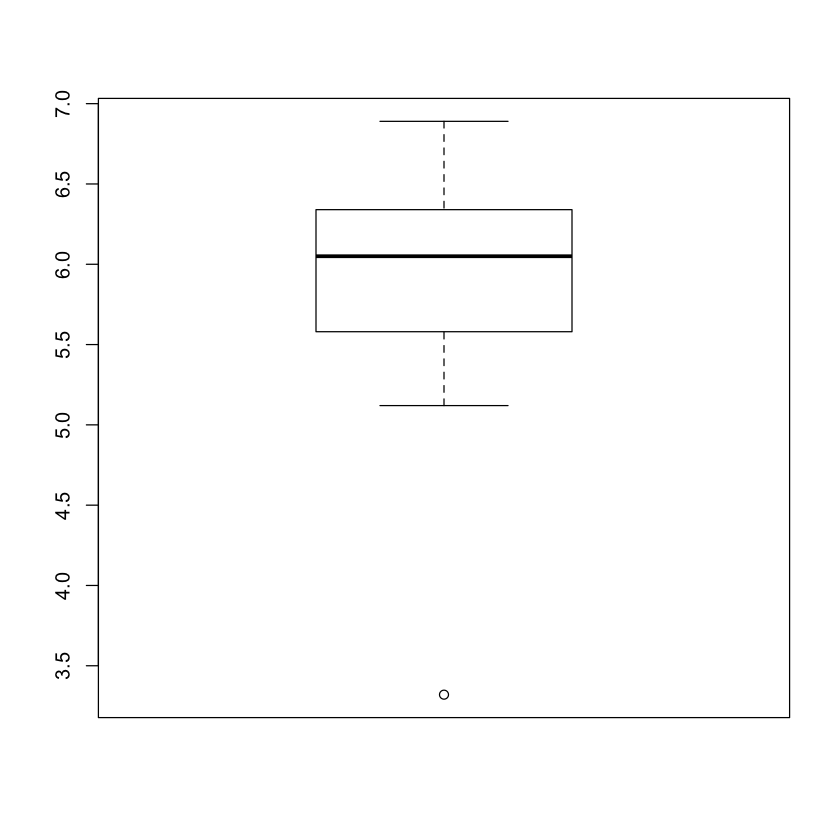

In [8]:
boxplot(moths$Isolation)

## The Shapiro Test will tell us if our suspicions are correct.

In [9]:
shapiro.test(moths$Isolation)


	Shapiro-Wilk normality test

data:  moths$Isolation
W = 0.85024, p-value = 0.004288


# What do the results of the Shapiro Test indicate regarding the distribution of our data? Does the test reject or support our null hypothesis?

## Let's log-transform these isolation data and see how they look then.

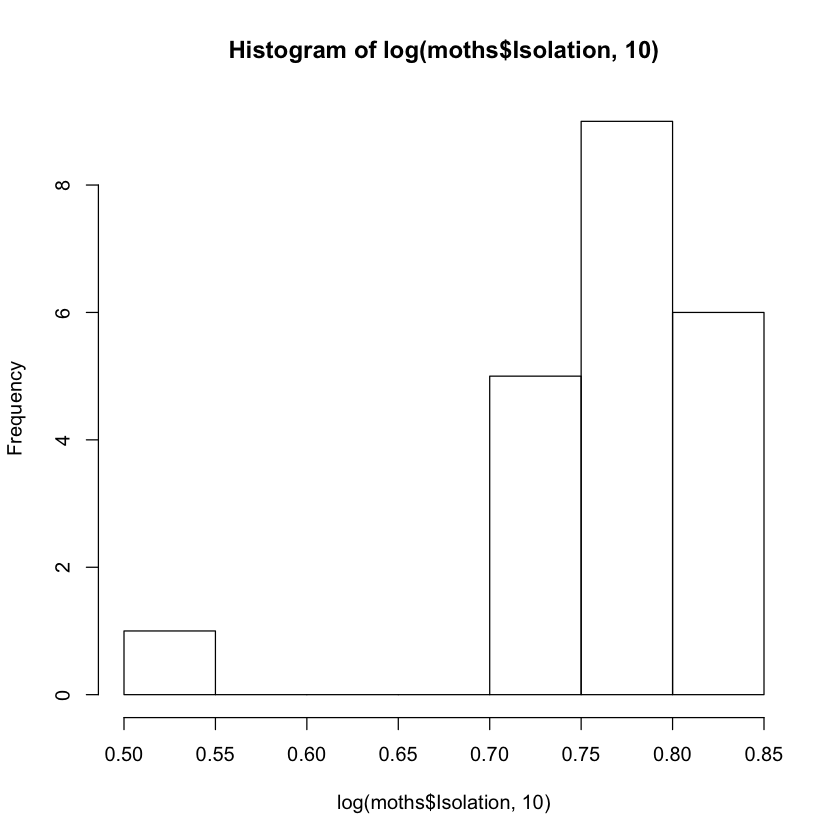

In [10]:
hist(log(moths$Isolation,10))

## Another Shapiro Test...

In [11]:
shapiro.test(sqrt(moths$Isolation))


	Shapiro-Wilk normality test

data:  sqrt(moths$Isolation)
W = 0.80637, p-value = 0.0008224


## We can test for outliers that affect the distribution of our data using a Dixon Test.
### First we need to install the associated R package.

In [12]:
install.packages("outliers", repos='http://cran.us.r-project.org', dependencies=TRUE)

library("outliers")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [13]:
dixon.test(moths$Isolation)


	Dixon test for outliers

data:  moths$Isolation
Q = 0.53687, p-value = 0.01487
alternative hypothesis: lowest value 3.32 is an outlier


# Does this test support the null or the alternative hypothesis?

## Which site had the 3.32 value? Let's pull up our .csv file again.

In [14]:
moths <- 
  read.csv("moths.csv",
   header=TRUE, sep=",", na.strings="NA", dec=".", strip.white=TRUE)
moths

region,site,area,ForstCover,Treediversity,Isolation,spp,lat,long
WAP,ClearCreek,289.0,84.9,5.59,6.89,85,39.593,-82.573
WAP,CraneHollow,180.9,82.2,8.61,6.80,81,39.630,-82.558
WAP,Phinney,93.5,84.3,6.84,6.70,96,39.558,-82.500
WAP,Rockbridge,89.8,38.3,5.09,6.34,47,39.575,-82.500
WAP,Wahkeena,72.8,53.4,2.25,6.38,65,39.635,-82.529
WAP,Klinger,22.6,29.3,7.06,6.03,66,39.587,-82.831
WAP,Fairview,6.9,12.5,3.94,5.43,43,39.525,-82.450
WAP,WindyHills,3.8,38.5,4.97,6.00,41,39.583,-82.533
WAP,RidgeLaurel,1.7,56.2,7.69,6.20,49,39.499,-82.573
NCT,Pater,230.6,37.1,9.01,6.21,90,39.433,-84.742


# Time to begin the linear regression.

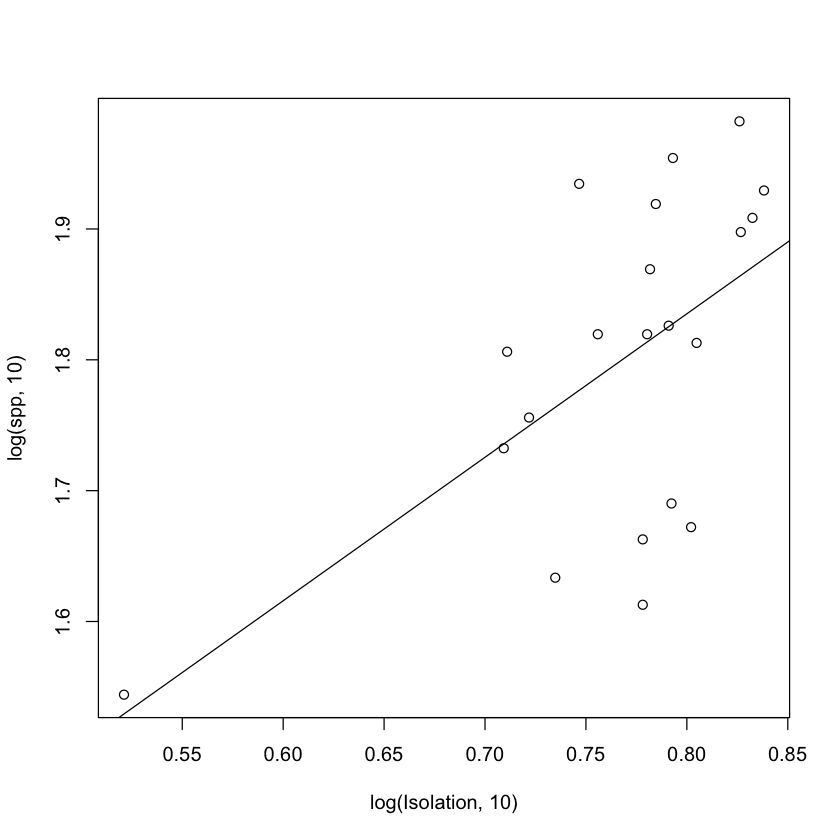

In [15]:
plot(log(spp,10) ~ log(Isolation,10), moths)
mod <- lm(log(spp,10) ~log(Isolation,10), data=moths)
abline(mod)

## Regression diagnostics can be used to assess our model. 

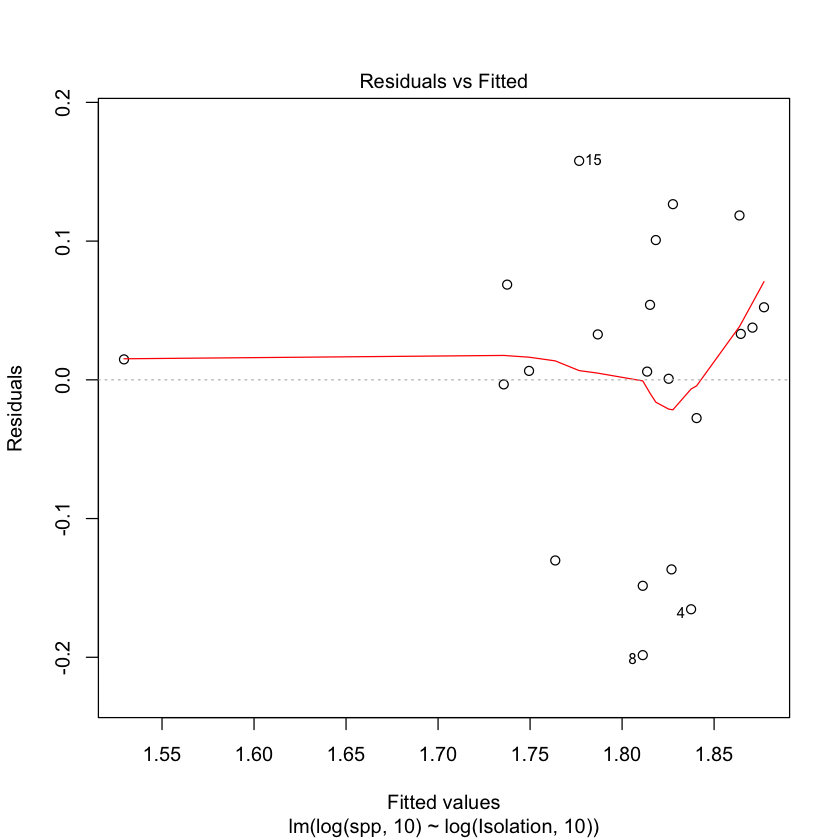

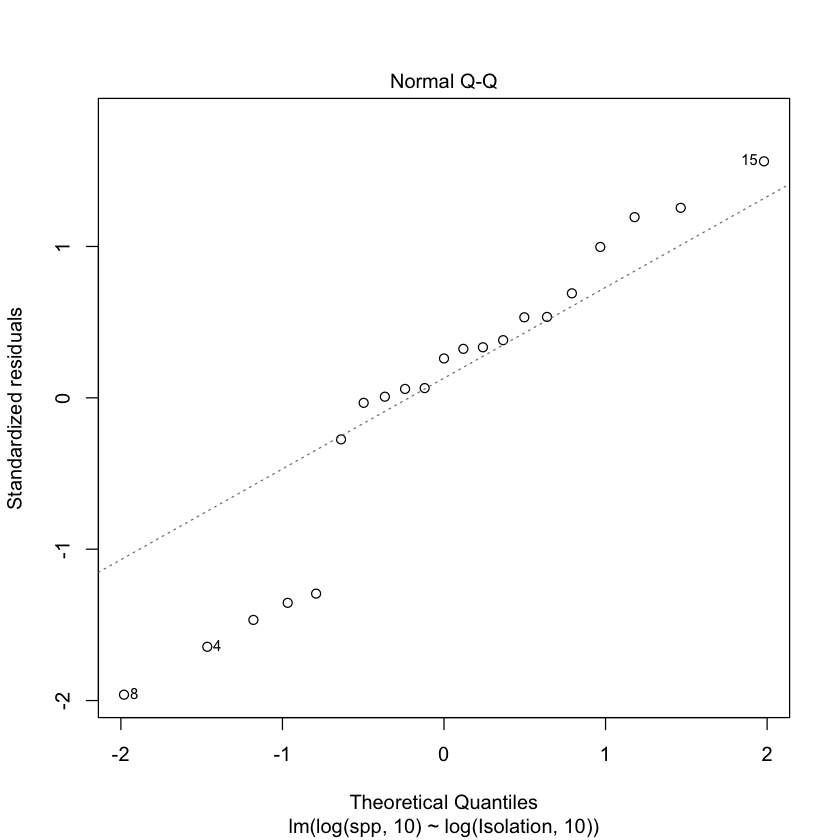

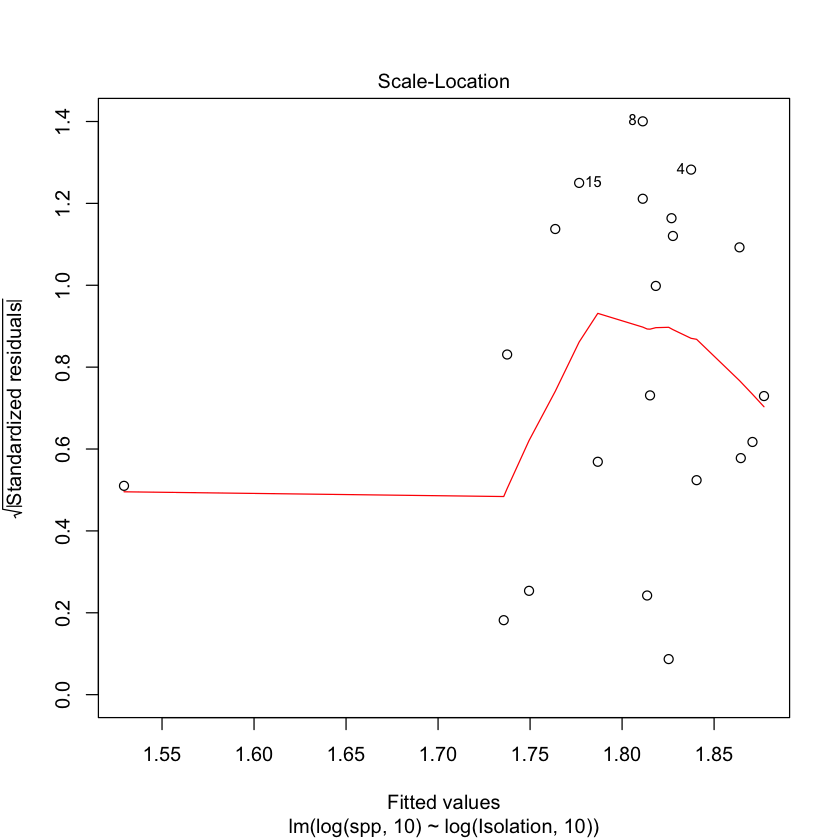

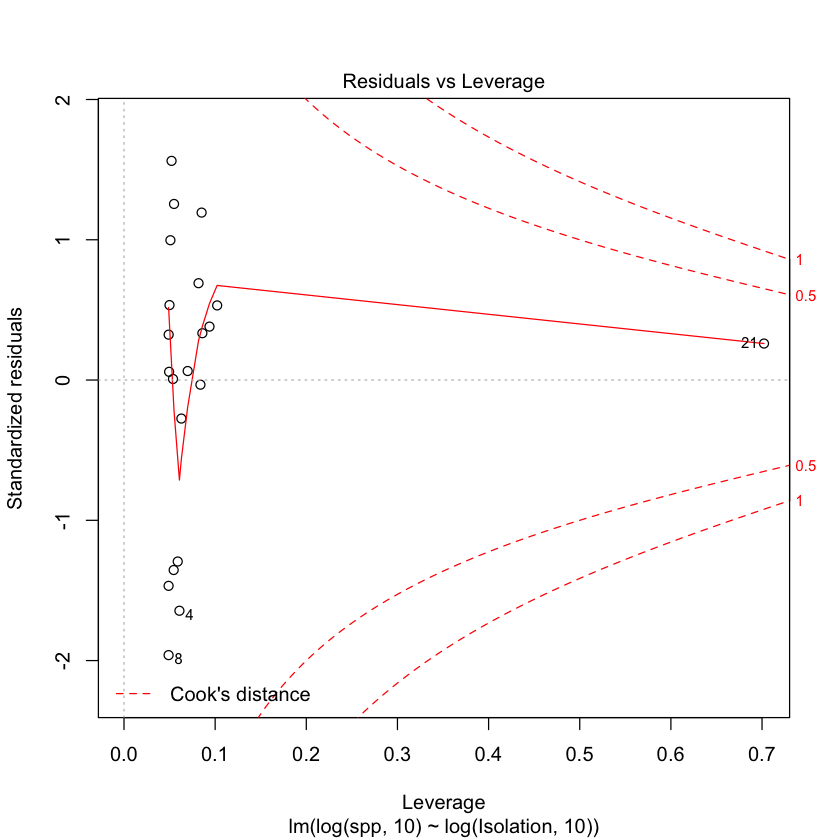

In [16]:
plot(mod)

## Now, the summary.

In [17]:
summary(mod)
mod
coef(mod)
confint(mod)
anova(mod)


Call:
lm(formula = log(spp, 10) ~ log(Isolation, 10), data = moths)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19845 -0.02757  0.01473  0.05405  0.15784 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)          0.9577     0.2627   3.645  0.00172 **
log(Isolation, 10)   1.0968     0.3412   3.214  0.00456 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1038 on 19 degrees of freedom
Multiple R-squared:  0.3523,	Adjusted R-squared:  0.3182 
F-statistic: 10.33 on 1 and 19 DF,  p-value: 0.004563



Call:
lm(formula = log(spp, 10) ~ log(Isolation, 10), data = moths)

Coefficients:
       (Intercept)  log(Isolation, 10)  
            0.9577              1.0968  


(Intercept) log(Isolation, 10) 
          0.957736           1.096826

,2.5 %,97.5 %
(Intercept),0.4078097,1.507662
"log(Isolation, 10)",0.3826603,1.810992


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"log(Isolation, 10)",1,0.1112498,0.11124976,10.33299,0.004563397
Residuals,19,0.2045629,0.01076647,NA,NA


## Splitting up the study regions.

In [18]:
NCTmoths<-subset(moths, region =="NCT")
NCTmoths
WAPmoths<-subset(moths, region=="WAP")
WAPmoths

,region,site,area,ForstCover,Treediversity,Isolation,spp,lat,long
10,NCT,Pater,230.6,37.1,9.01,6.21,90,39.433,-84.742
11,NCT,Brookville,118.2,31.1,7.65,6.09,83,39.504,-85.005
12,NCT,Hueston,88.9,39.1,3.45,6.71,79,39.570,-84.758
13,NCT,Western,68.0,25.7,4.41,6.05,74,39.501,-84.721
14,NCT,McClure,58.7,16.5,3.24,5.70,66,39.456,-84.874
15,NCT,Bittner,38.2,15.0,5.52,5.58,86,39.434,-84.785
16,NCT,Gregg,29.5,10.4,3.70,5.27,57,39.477,-84.720
17,NCT,Jericho,11.1,4.8,7.41,5.14,64,39.539,-84.727
18,NCT,Hermann,9.6,6.3,5.70,5.12,54,39.434,-84.808
19,NCT,Kramer,5.2,38.6,3.27,6.18,67,39.528,-84.716


region,site,area,ForstCover,Treediversity,Isolation,spp,lat,long
WAP,ClearCreek,289.0,84.9,5.59,6.89,85,39.593,-82.573
WAP,CraneHollow,180.9,82.2,8.61,6.80,81,39.630,-82.558
WAP,Phinney,93.5,84.3,6.84,6.70,96,39.558,-82.500
WAP,Rockbridge,89.8,38.3,5.09,6.34,47,39.575,-82.500
WAP,Wahkeena,72.8,53.4,2.25,6.38,65,39.635,-82.529
WAP,Klinger,22.6,29.3,7.06,6.03,66,39.587,-82.831
WAP,Fairview,6.9,12.5,3.94,5.43,43,39.525,-82.450
WAP,WindyHills,3.8,38.5,4.97,6.00,41,39.583,-82.533
WAP,RidgeLaurel,1.7,56.2,7.69,6.20,49,39.499,-82.573


## Linear regression on WAP...

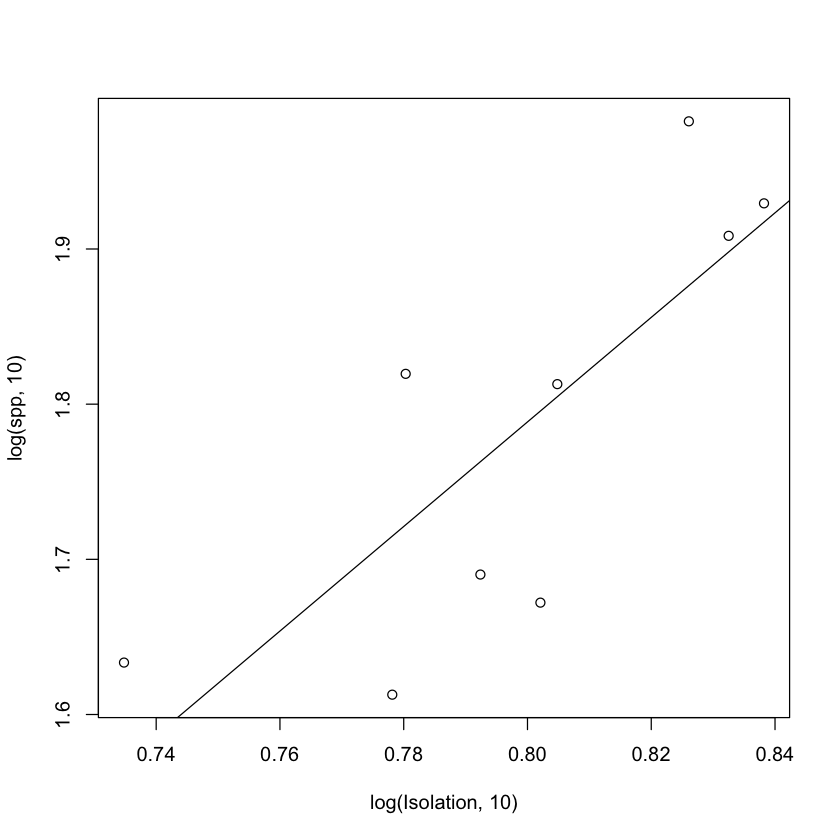

In [33]:
plot(log(spp,10) ~ log(Isolation,10), WAPmoths)
WAPmod <- lm(log(spp,10) ~log(Isolation,10), data=WAPmoths)
abline(WAPmod)

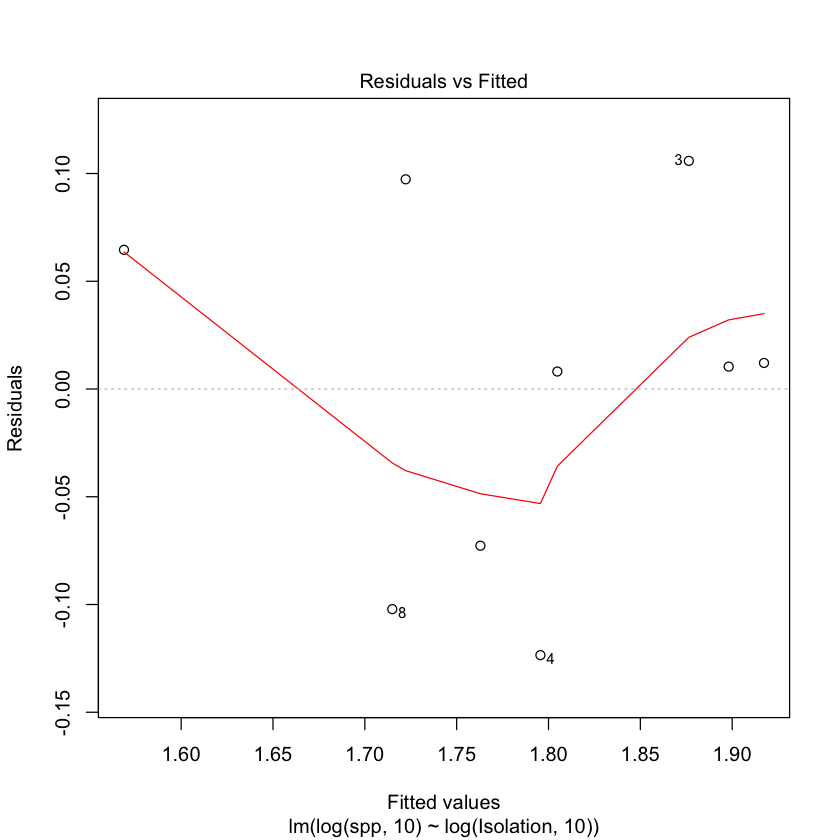

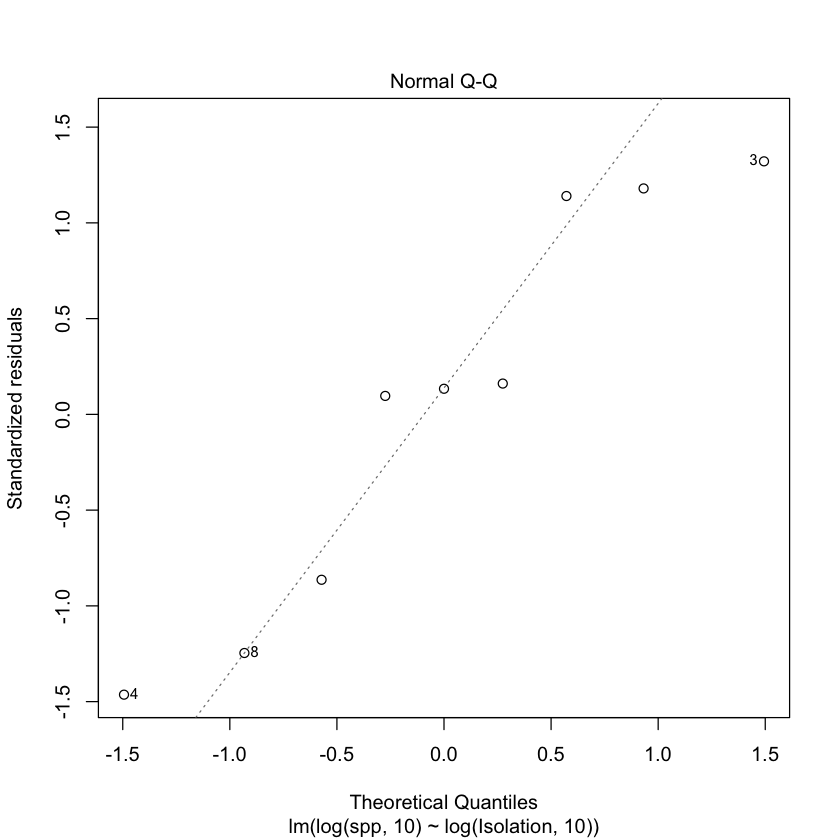

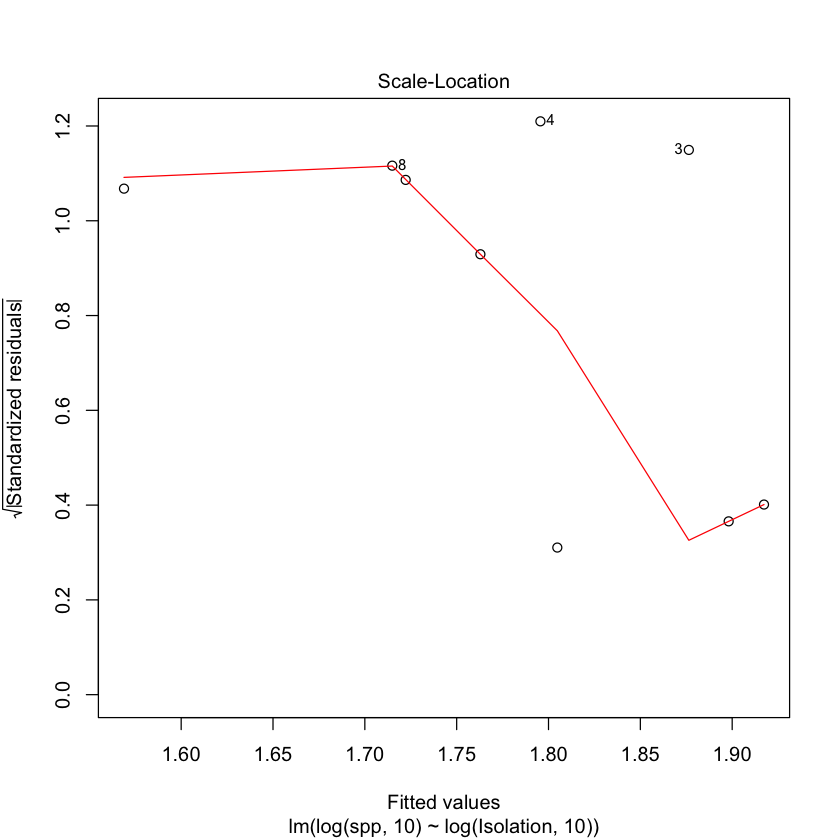

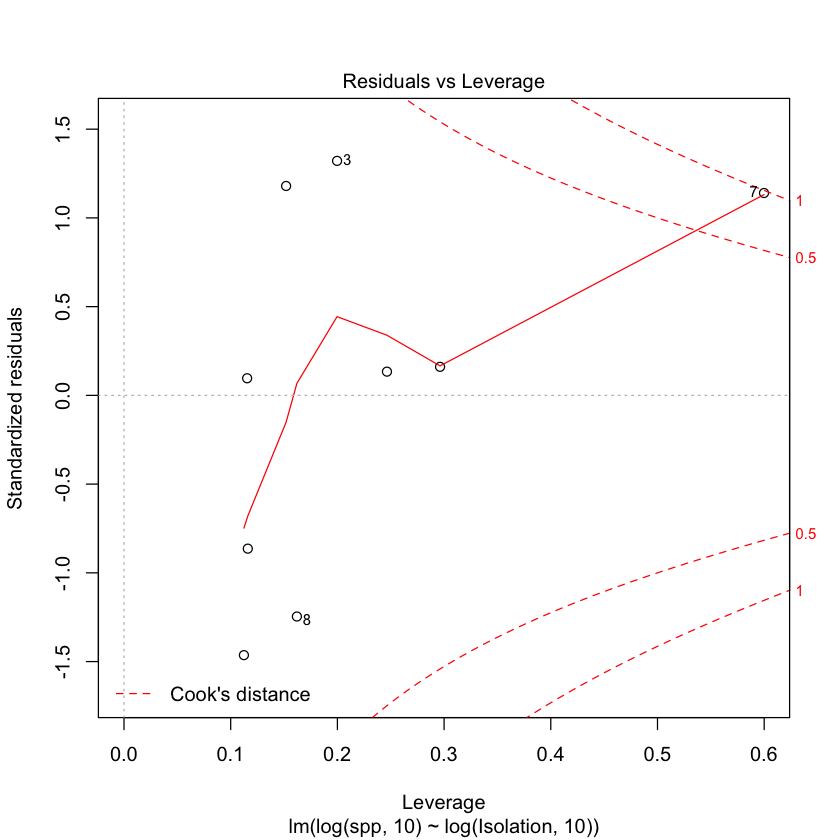

In [34]:
plot(WAPmod)

In [35]:
summary(WAPmod)
mod
coef(WAPmod)
confint(mod)
anova(WAPmod)


Call:
lm(formula = log(spp, 10) ~ log(Isolation, 10), data = WAPmoths)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12349 -0.07272  0.01040  0.06459  0.10586 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)         -0.9069     0.7818  -1.160   0.2841  
log(Isolation, 10)   3.3693     0.9780   3.445   0.0108 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08956 on 7 degrees of freedom
Multiple R-squared:  0.629,	Adjusted R-squared:  0.576 
F-statistic: 11.87 on 1 and 7 DF,  p-value: 0.01076



Call:
lm(formula = log(spp, 10) ~ log(Isolation, 10), data = moths)

Coefficients:
       (Intercept)  log(Isolation, 10)  
            0.9577              1.0968  


(Intercept) log(Isolation, 10) 
        -0.9069069          3.3693260

,2.5 %,97.5 %
(Intercept),0.4078097,1.507662
"log(Isolation, 10)",0.3826603,1.810992


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"log(Isolation, 10)",1,0.09520330,0.095203300,11.86995,0.01075992
Residuals,7,0.05614372,0.008020531,NA,NA


## Linear regression on NCT...follow the same steps as above.

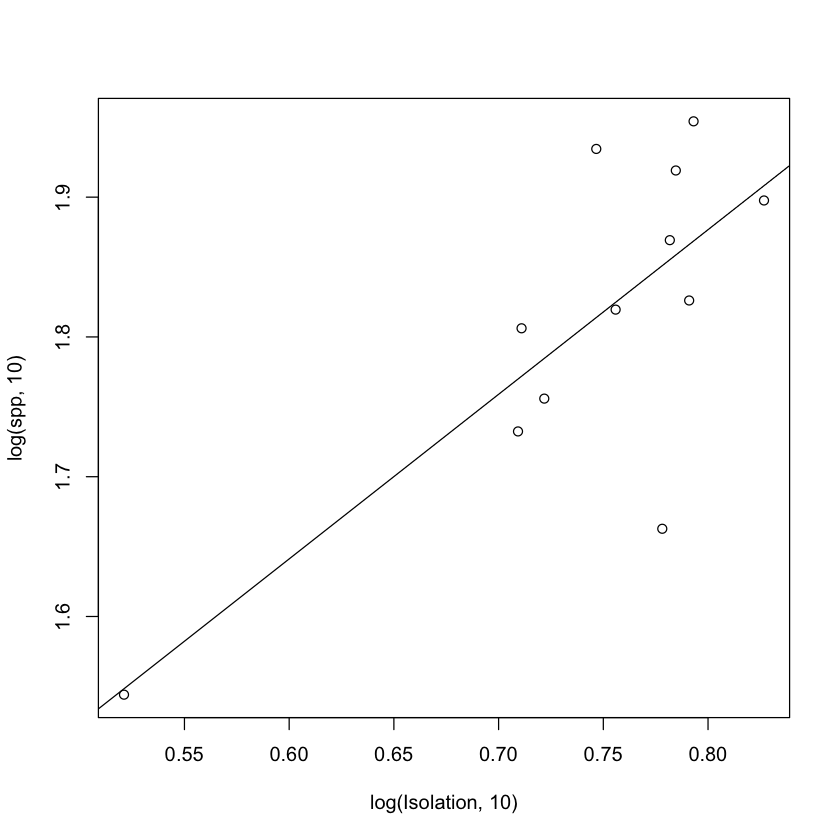

In [29]:
plot(log(spp,10) ~ log(Isolation,10), NCTmoths)
NCTmod <- lm(log(spp,10) ~log(Isolation,10), data=NCTmoths)
abline(NCTmod)

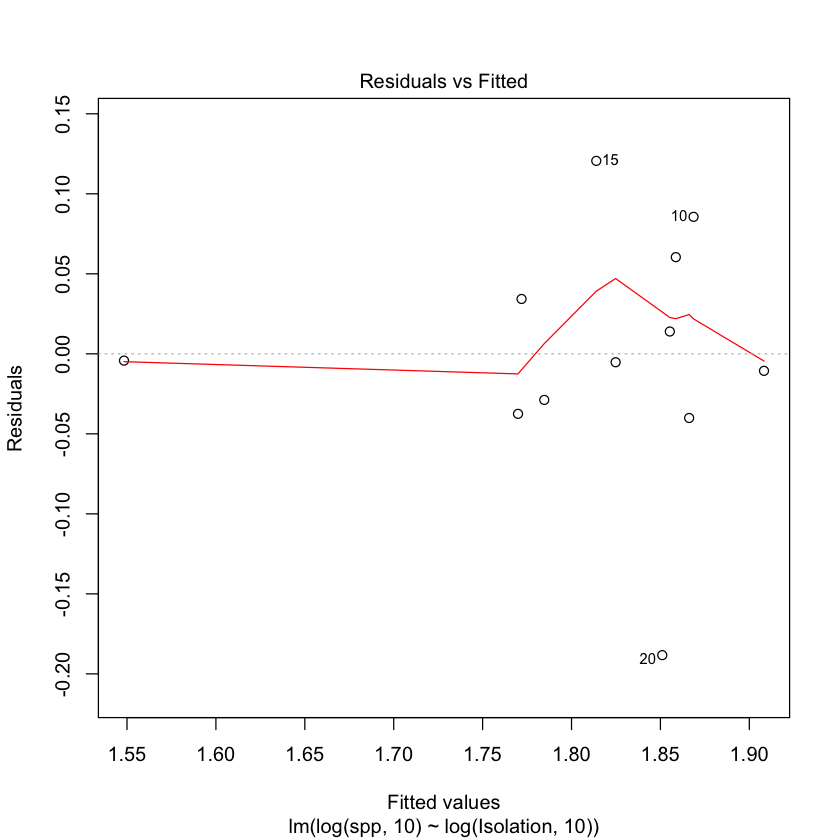

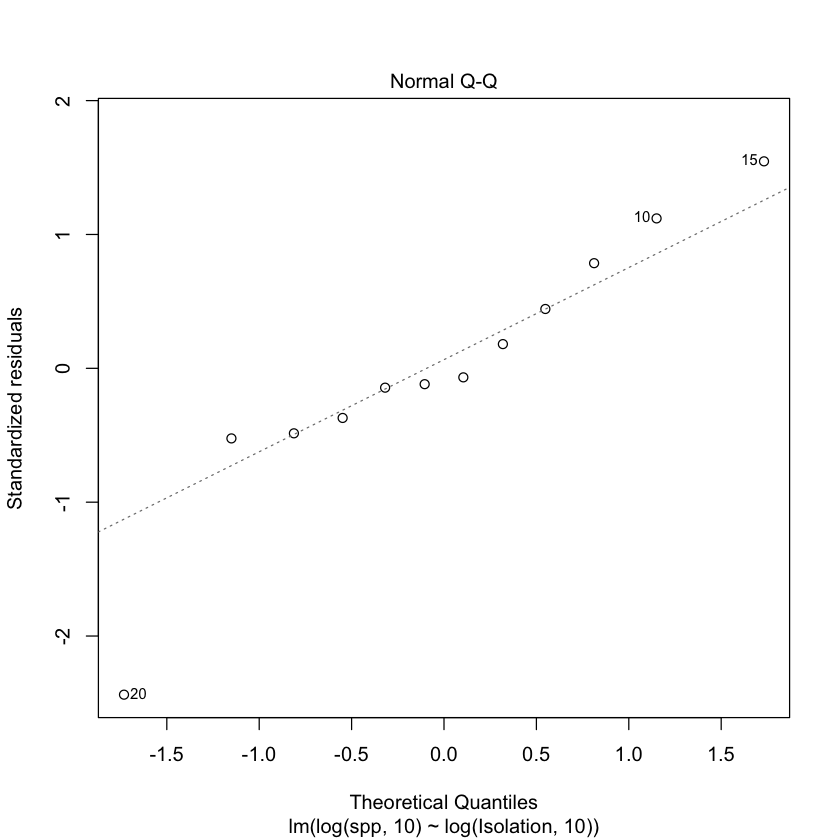

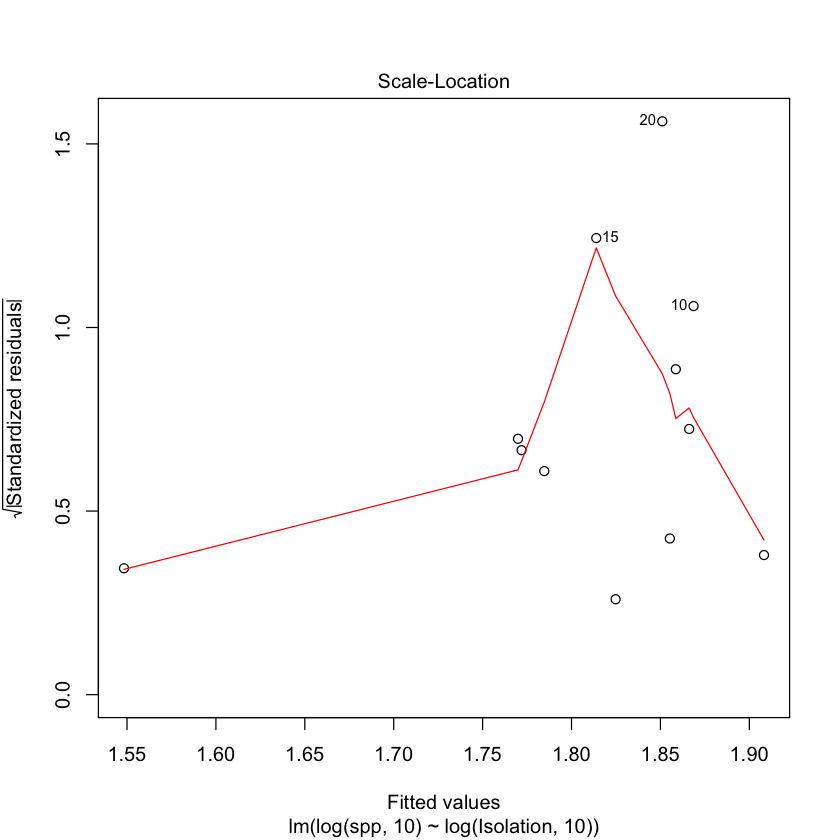

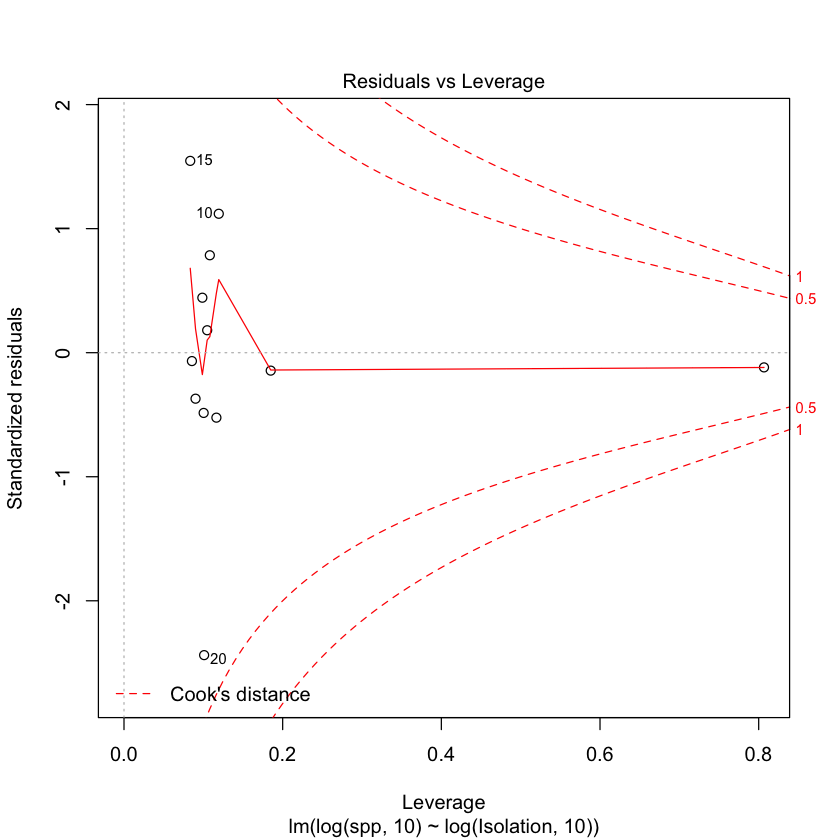

In [30]:
plot(NCTmod)

In [36]:
summary(NCTmod)
mod
coef(NCTmod)
confint(mod)
anova(NCTmod)


Call:
lm(formula = log(spp, 10) ~ log(Isolation, 10), data = NCTmoths)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.188285 -0.030982 -0.004751  0.040813  0.120579 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)          0.9345     0.2329   4.013  0.00247 **
log(Isolation, 10)   1.1779     0.3117   3.780  0.00360 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08145 on 10 degrees of freedom
Multiple R-squared:  0.5882,	Adjusted R-squared:  0.547 
F-statistic: 14.28 on 1 and 10 DF,  p-value: 0.003605



Call:
lm(formula = log(spp, 10) ~ log(Isolation, 10), data = moths)

Coefficients:
       (Intercept)  log(Isolation, 10)  
            0.9577              1.0968  


(Intercept) log(Isolation, 10) 
         0.9344673          1.1778884

,2.5 %,97.5 %
(Intercept),0.4078097,1.507662
"log(Isolation, 10)",0.3826603,1.810992


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"log(Isolation, 10)",1,0.09476608,0.094766079,14.28473,0.003604825
Residuals,10,0.06634081,0.006634081,NA,NA
